# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

# **PYTHON FOR DATA ANALYSIS 2 - GROUP ASSIGNMENT - GROUP 2**

- **FELIPE BASURTO**  
- **WEI CHENG LEE**
-  **LOUIS RITZ** 
- **MARÍA BOTELLO**
-  **IVÁN DOMÍNGUEZ** 
- **RADHIKA PATEL**
-  **MAURIZIO POLIZZI**

**IMPORTS**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import catboost as cat
import pickle

**SURPRESS WARNINGS**

In [6]:
# surpress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**READING THE DATA**

In [7]:
df = pd.read_csv("bike-sharing_hourly.csv")

## PART I: Exploratory Data Analysis

**CHECKING THE DATAFRAME**

In [8]:
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

**INFORMATION ABOUT THE DIFFERENT COLUMNS**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**DESCRIPTIVE STATISTICS**

In [10]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [11]:
df["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

**CHECKING FOR NULL VALUES**

In [12]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The obvious column to predict seems the `count of users` one. Given certain circumstances, estimate how many users would use our service.

------------

**PLOTTING SOME INTERESTING GRAPHS**

Lets plot the Rental bike counts and lets see how all the different variables are affecting it.

In [13]:
# 1. Distribution of Rental Counts
fig = px.histogram(df, x="cnt", nbins=100, title='Distribution of Rental Counts')
fig.show()

Lets check how the different seasons of the year are affecting the number of bikes rented.

In [14]:
# 2. Rental Counts by Season
grouped_season = df.groupby("season").sum()["cnt"]

fig = px.bar(grouped_season, title="Rental Counts by Season")
fig.update_layout(xaxis_title="Season", yaxis_title="Rental counts",
                  xaxis=dict(tickmode='array', tickvals=[1, 2, 3, 4],
                             ticktext=['Winter', 'Spring', 'Summer', 'Fall']))
fig.show()

Okay, now lets check how the different months of the year are affecting the number of bikes rented.

In [15]:
# 4. Rental Counts by Month of the year
grouped_month = df.groupby("mnth").sum()["cnt"]

fig = px.bar(grouped_month, title="Rental Counts by Month")
fig.update_layout(xaxis_title="Month", yaxis_title="Rental counts",
                  xaxis=dict(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 
                                       'July', 'August', 'September', 'October', 'November', 'December']))
fig.show()

Same but for days of the week.

In [16]:
# 5. Rental Counts by Day of the week
grouped_day = df.groupby("weekday").sum()["cnt"]

fig = px.bar(grouped_day, title="Rental Counts by Day of the week")
fig.update_layout(xaxis_title="Day of the week", yaxis_title="Rental counts",
                  xaxis=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4, 5, 6], 
                             ticktext=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']))
fig.show()

Does the fact if the day is a weekend or not affect the number of bikes rented?

In [17]:
# 6. Rental Counts by weekday or weekend
grouped_weekday = df.groupby("workingday").sum()["cnt"]

fig = px.bar(grouped_weekday, title="Rental Counts if the Day is a weekday or weekend")
fig.update_layout(xaxis_title="Weekday or Weekend?", yaxis_title="Rental counts",
                  xaxis=dict(tickmode='array', tickvals=[0, 1],
                             ticktext=['Weekend', 'Weekday']))
fig.show()

And how about the weather? The better the weather, the more bikes rented?

In [18]:
# 7. Rental Counts by weather situation
grouped_weather = df.groupby("weathersit").sum()["cnt"]

fig = px.bar(grouped_weather, title="Rental Counts by Weather situation")
fig.update_layout(xaxis_title="Weather Situation", yaxis_title="Rental counts", 
                  xaxis=dict(tickmode='array', tickvals=[1,2,3,4], 
                             ticktext=['Clear, Few clouds, Partly cloudy', 
                                       'Mist + Cloudy, Mist + Broken clouds', 
                                       'Light Snow, Light Rain + Thunderstorm', 
                                       'Heavy Rain + Ice Pallets + Thunderstorm + Snow, Fog']))
fig.show()

Temperature has a lot to do with weather, but can give us some interesting insights.

In [19]:
# 8. Rental Counts by Temperature and Feeling temperature

fig = px.scatter(df, x="temp", y="cnt", trendline="lowess", title="Rental Counts by Temperature", trendline_color_override="red")
fig2 = px.scatter(df, x="atemp", y="cnt", trendline="lowess", title="Rental Counts by Feeling Temperature", trendline_color_override="red")
fig.update_layout(xaxis_title="Temperature", yaxis_title="Rental counts")
fig2.update_layout(xaxis_title="Feeling Temperature", yaxis_title="Rental counts")
fig.show()
fig2.show()

If the weather is nice, but there is too much humidity, people might not want to rent a bike, they will get all sweaty.

In [20]:
# 9. Rental Counts by Humidity

fig = px.scatter(df, x="hum", y="cnt", trendline="lowess", title="Rental Counts by Humidity", trendline_color_override="red")
fig.update_layout(xaxis_title="Humidity", yaxis_title="Rental counts")
fig.show()

We kind of deduced that the number of casual users has a limit. Once you reach that limit, you will probably become a registered user.

In [21]:
# 10. Rental Counts by type of user (registered or casual)

fig = go.Figure()
fig.add_trace(go.Histogram(x=df["registered"], name="Registered"))
fig.add_trace(go.Histogram(x=df["casual"], name="Casual"))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.update_layout(title="Distribution of rental counts by type of user", xaxis_title="Number of registered and casual users")
fig.show()

In the long run, casual users are usually never more than 100. The vast majority of the users of this service are registered users. As we are able to see, the most common value is to have around 1 or 2 casual users in every `cnt` data point

**CORRELATION MATRIX**

Just by looking at the data, we know that some variables are going to be correlated. Stuff such as `casual`, `registered` and `cnt` are going to be correlated. Lets see how much. \
Same with `temp` and `atemp` and many others.

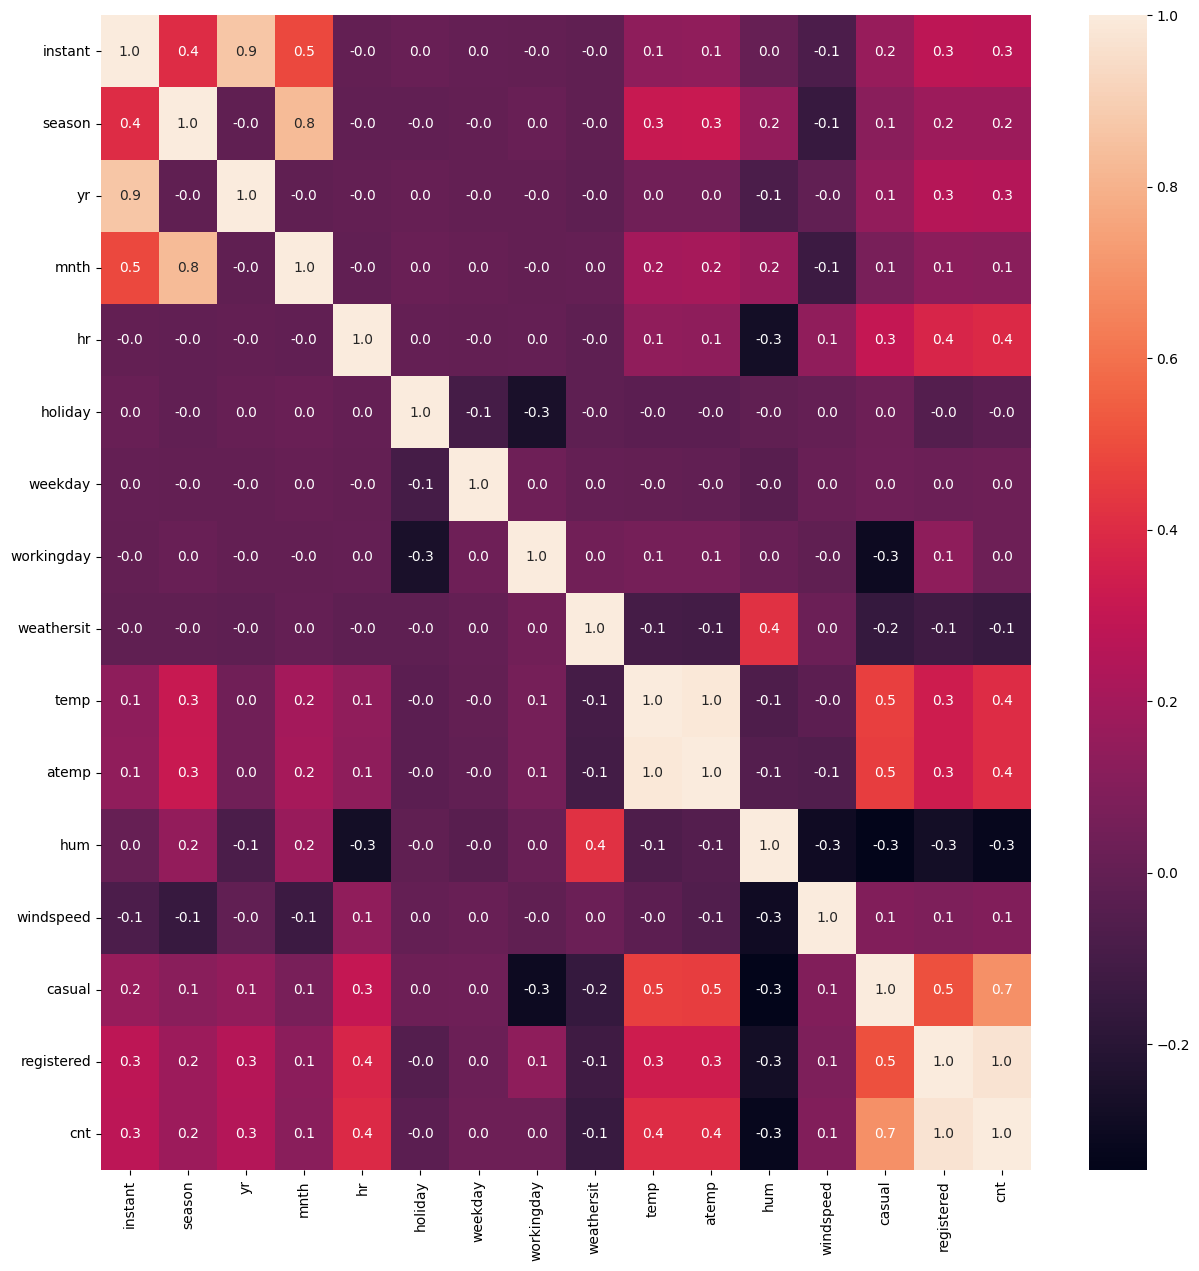

In [22]:
# Plotting correlation between the variables

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt= ".1f")
plt.show()

------------

**EXTRACTING THE DAY FROM `dteday`**

Since it is somewhat difficult to work with exact dates, we are extarcting the column that we were missing, which is the `day` column.

We also added the `hour` to the `dteday` column, so we can have a more precise date, and it will help us to do the time series split for the Machine Learning part. \
We wont use this feature in the model. But is really helpful for explaining the data.

In [23]:
df['dteday'] = pd.to_datetime(df['dteday'] + ' ' + df['hr'].astype(str) + ':00:00')
df['dteday']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [24]:
df['day'] = df['dteday'].dt.day

df[['dteday', 'day']]

dteday  day
0     2011-01-01 00:00:00    1
1     2011-01-01 01:00:00    1
2     2011-01-01 02:00:00    1
3     2011-01-01 03:00:00    1
4     2011-01-01 04:00:00    1
...                   ...  ...
17374 2012-12-31 19:00:00   31
17375 2012-12-31 20:00:00   31
17376 2012-12-31 21:00:00   31
17377 2012-12-31 22:00:00   31
17378 2012-12-31 23:00:00   31

[17379 rows x 2 columns]

**SOME OTHER DATE-RELATED FEATURES**

In [25]:
# Create a feature for time of day
df["time_of_day"] = pd.cut(df["hr"], bins=[0, 6, 12, 18, 24], labels=["night", "morning", "afternoon", "evening"], include_lowest=True)
df[['hr', 'time_of_day']]

hr time_of_day
0       0       night
1       1       night
2       2       night
3       3       night
4       4       night
...    ..         ...
17374  19     evening
17375  20     evening
17376  21     evening
17377  22     evening
17378  23     evening

[17379 rows x 2 columns]

At the end, we combined holiday and holiday_eve, since they are really correlated and dont provide much different info.

In [26]:
# Create a new feature that indicates whether a day is a holiday eve or not
df["holiday_eve"] = df["holiday"].shift(-1).fillna(0)
df["holiday"] = (df["holiday"] + df["holiday_eve"]).apply(lambda x: 1 if x >= 1 else 0)

df[df["holiday"]!= 0][["dteday","holiday"]]

dteday  holiday
371   2011-01-16 23:00:00        1
372   2011-01-17 00:00:00        1
373   2011-01-17 01:00:00        1
374   2011-01-17 02:00:00        1
375   2011-01-17 03:00:00        1
...                   ...      ...
17230 2012-12-25 19:00:00        1
17231 2012-12-25 20:00:00        1
17232 2012-12-25 21:00:00        1
17233 2012-12-25 22:00:00        1
17234 2012-12-25 23:00:00        1

[521 rows x 2 columns]

**WEATHER-RELATED FEATURES**

In [27]:
# Create a feature that indicates whether it's comfortable or not
df["comfortable_temp"] = ((df["atemp"] > 0.40) & (df["atemp"] < 0.65)).astype(int)

df[["atemp","comfortable_temp"]]

atemp  comfortable_temp
0      0.2879                 0
1      0.2727                 0
2      0.2727                 0
3      0.2879                 0
4      0.2879                 0
...       ...               ...
17374  0.2576                 0
17375  0.2576                 0
17376  0.2576                 0
17377  0.2727                 0
17378  0.2727                 0

[17379 rows x 2 columns]

There is a threshold in humidity to be comfortable. If the humidity is below or above that threshold, people will not want to rent a bike. \

In [28]:
# Create a feature that indicates whether it's humid or not
df["comfortable_humidity"] = ((df["hum"] > 0.25) & (df["hum"] < 0.55)).astype(int)

df[["hum", "comfortable_humidity"]]

hum  comfortable_humidity
0      0.81                     0
1      0.80                     0
2      0.80                     0
3      0.75                     0
4      0.75                     0
...     ...                   ...
17374  0.60                     0
17375  0.60                     0
17376  0.60                     0
17377  0.56                     0
17378  0.65                     0

[17379 rows x 2 columns]

**DROPPING HIGHLY CORRELATED COLUMNS**

We are dropping the index, the temperature, since we already have the `atemp` column, which is more precise (since in the end we are predicting humar behaviour) and the `holiday_eve` column, since we combined it with the `holiday` column.

In [29]:
df = df.drop(["instant", "temp","holiday_eve"], axis=1)

This two columns are super nice to get high scores on the test set! But we just need to drop them since its data that we don't have access to when we want to predict the number of rentals.

In [30]:
df = df.drop(["casual", "registered"], axis=1)

**CORRELATION MATRIX**

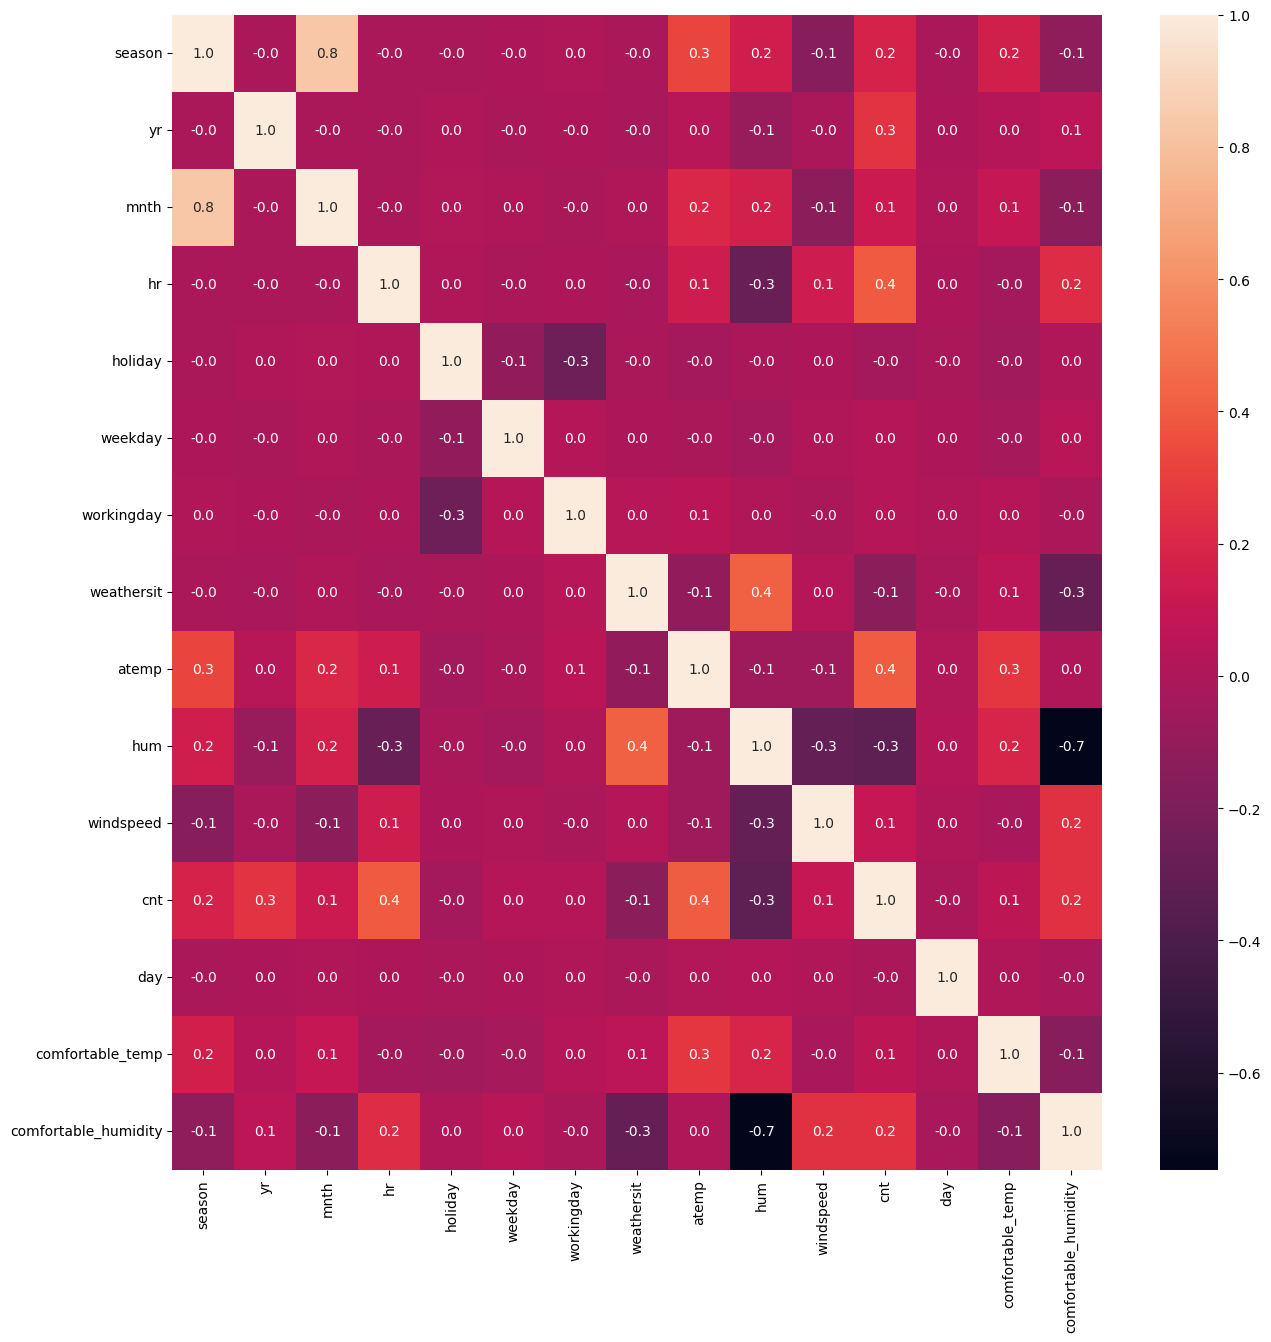

In [31]:
# Plotting the new correlation between the variables

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt= ".1f")
plt.show()

**REMOVING OUTLIERS**

When plotting the humidity correlation with the Rental bike counts, we can see that there are some outliers, maybe due to human or technical error when calculating the humidity levels at that time. \
We will remove them.

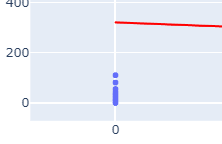

In [32]:
df[df["hum"] == 0].head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551 2011-03-10 00:00:00       1   0     3   0        0        4           1   
1552 2011-03-10 01:00:00       1   0     3   1        0        4           1   
1553 2011-03-10 02:00:00       1   0     3   2        0        4           1   
1554 2011-03-10 05:00:00       1   0     3   5        0        4           1   
1555 2011-03-10 06:00:00       1   0     3   6        0        4           1   

      weathersit   atemp  hum  windspeed  cnt  day time_of_day  \
1551           3  0.3182  0.0     0.2537    3   10       night   
1552           3  0.3182  0.0     0.2537    2   10       night   
1553           3  0.3182  0.0     0.2537    1   10       night   
1554           3  0.3485  0.0     0.1940    3   10       night   
1555           3  0.3333  0.0     0.3284   12   10       night   

      comfortable_temp  comfortable_humidity  
1551                 0                     0  
1552                 0                     0  
1553                 0                     0  
1554                 0                     0  
1555                 0                     0

Since they are just 22 rows (they correspond to a day in the year 2012 where some sensor might be broken), we can safely remove them. \
Another possible approach would be to calculate the median of the humidity values for that day and temperatures in the past year and replace the outliers with that value, but since the data quantity is so low we will just remove them.

In [33]:
# Removing rows where humidity == 0
df = df[df["hum"] != 0]

df[df["hum"] == 0].head()

Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, atemp, hum, windspeed, cnt, day, time_of_day, comfortable_temp, comfortable_humidity]
Index: []

**ENCODING THE `time_of_day` FEATURE**

In [37]:
le = LabelEncoder()
df["time_of_day"] = le.fit_transform(df["time_of_day"])

In [38]:
df

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0     2011-01-01 00:00:00       1   0     1   0        0        6           0   
1     2011-01-01 01:00:00       1   0     1   1        0        6           0   
2     2011-01-01 02:00:00       1   0     1   2        0        6           0   
3     2011-01-01 03:00:00       1   0     1   3        0        6           0   
4     2011-01-01 04:00:00       1   0     1   4        0        6           0   
...                   ...     ...  ..   ...  ..      ...      ...         ...   
17374 2012-12-31 19:00:00       1   1    12  19        0        1           1   
17375 2012-12-31 20:00:00       1   1    12  20        0        1           1   
17376 2012-12-31 21:00:00       1   1    12  21        0        1           1   
17377 2012-12-31 22:00:00       1   1    12  22        0        1           1   
17378 2012-12-31 23:00:00       1   1    12  23        0        1           1   

       weathersit   atemp   hum  windspeed  cnt  day  time_of_day  \
0               1  0.2879  0.81     0.0000   16    1            3   
1               1  0.2727  0.80     0.0000   40    1            3   
2               1  0.2727  0.80     0.0000   32    1            3   
3               1  0.2879  0.75     0.0000   13    1            3   
4               1  0.2879  0.75     0.0000    1    1            3   
...           ...     ...   ...        ...  ...  ...          ...   
17374           2  0.2576  0.60     0.1642  119   31            1   
17375           2  0.2576  0.60     0.1642   89   31            1   
17376           1  0.2576  0.60     0.1642   90   31            1   
17377           1  0.2727  0.56     0.1343   61   31            1   
17378           1  0.2727  0.65     0.1343   49   31            1   

       comfortable_temp  comfortable_humidity  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0  
...                 ...                   ...  
17374                 0                     0  
17375                 0                     0  
17376                 0                     0  
17377                 0                     0  
17378                 0                     0  

[17357 rows x 17 columns]

--------------------

Here, we are writing the pre-processed dataframe to be able to use it in Pycaret, since we dont want to do the preprocessing itself with that library.

In [40]:
df.to_csv("preprocessed-df.csv", index=False)

## PART II: Prediction Model

In [41]:
cutoff_date = pd.to_datetime('2012-09-01')
train = df.loc[df.dteday < cutoff_date]
test = df.loc[df.dteday >= cutoff_date]

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions ' + str(test.shape))

Data for Modeling: (14469, 17)
Unseen Data For Predictions (2888, 17)


We will need this function for future metrics, it basically computes the number of correct predictions when applying a threshold to the predicted values. \
Just because we are counting bikes and not something way more important or fractional, it is not a huge deal if the model is a couple bikes off the solution.

In [42]:
def acper(y_true, y_pred):
    """
    This function calculates Almost Correct Predictions Error Rate (ACPER)
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :returns: acper score
    """
    threshold = 2 # If the model predicts to bikes more or 2 bikes less than the real value, it will be considered as correct prediction.
    for yt, yp in zip(y_true, y_pred):
        lower_bound = yt - (threshold * yt)
        upper_bound = yt + (threshold * yt)
        if (yp >= lower_bound) & (yp <= upper_bound):
          yield True
        else:
          yield False

### **COMPARING MODELS - DEFAULT VS PYCARET**

Okay, so lets do something here. We chose a train and test data, where we will train our models on. \
The first one is a normal Catboost Regressor, which is the model that Pycaret said to perform the best. \
The second one is a Catboost Regressor, but this time we will use Pycaret to tune the hyperparameters and do some extra preprocessing. \
Lets see how they perform, and if there is a huge difference.

**DEFAULT MODEL**

In [51]:
X_train, y_train, X_test, y_test = train.drop(["cnt", "dteday"], axis=1), train["cnt"], test.drop(["cnt", "dteday"], axis=1), test["cnt"]

default_model = cat.CatBoostRegressor(verbose=False)
default_model.fit(X_train, y_train)

y_pred = default_model.predict(X_test)
score = mean_absolute_error(y_pred, y_test)
cv = cross_val_score(default_model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
acper_list = list(acper(y_test, y_pred))

print(f"Mean rental count: {y_test.mean()}")
print(f"R2 SCORE: {r2_score(y_pred, y_test)}")
print(f"MAE CV: {-cv}")
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")
print(f"Percentage of error: {mean_absolute_error(y_pred, y_test)/y_test.mean()*100:.2f}% \n")
print(f"Almost Correct Predictions: {(acper_list.count(True)/len(acper_list))*100:.2f}%")

Mean rental count: 240.2323407202216
R2 SCORE: 0.8688709815119974
MAE CV: [41.7996487  28.45845067 34.64551377 44.24700783 42.98229071]
MAE: 47.233661871113085
Percentage of error: 19.66% 

Almost Correct Predictions: 91.31%


Here it comes the second model, the one that we will used Pycaret to tune the hyperparameters and do some extra preprocessing. \
It comes pre-trained and ready to use.
The module `pickle` from pythton standard library was used in the other notebook to save the model, so we can load it here.

In [53]:
model = pickle.load(open("bikeRentalsModel.pkl", "rb"))

**PYCARET MODEL**

In [54]:
y_pred_2 = model.predict(X_test)
score = mean_absolute_error(y_pred_2, y_test)
cv = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
acper_list = list(acper(y_test, y_pred_2))

print(f"Mean rental count: {y_test.mean()}")
print(f"R2 SCORE: {r2_score(y_pred_2, y_test)}")
print(f"MAE CV: {-cv}")
print(f"MAE: {mean_absolute_error(y_pred_2, y_test)}")
print(f"Percentage of error: {mean_absolute_error(y_pred_2, y_test)/y_test.mean()*100:.2f}% \n")
print(f"Almost Correct Predictions: {(acper_list.count(True)/len(acper_list))*100:.2f}%")

Mean rental count: 240.2323407202216
R2 SCORE: 0.8585872252605904
MAE CV: [41.45405216 28.29920596 34.13205079 41.59364766 42.4328545 ]
MAE: 50.728058555884566
Percentage of error: 21.12% 

Almost Correct Predictions: 90.13%


Funny enough, the default model performed better than the one that we tuned with Pycaret! \
This is some stuff that can completely happen! That is why you always need to check these kind of things.

Maybe, the first you see when you go inside catboost web page tells you something about what happened here...

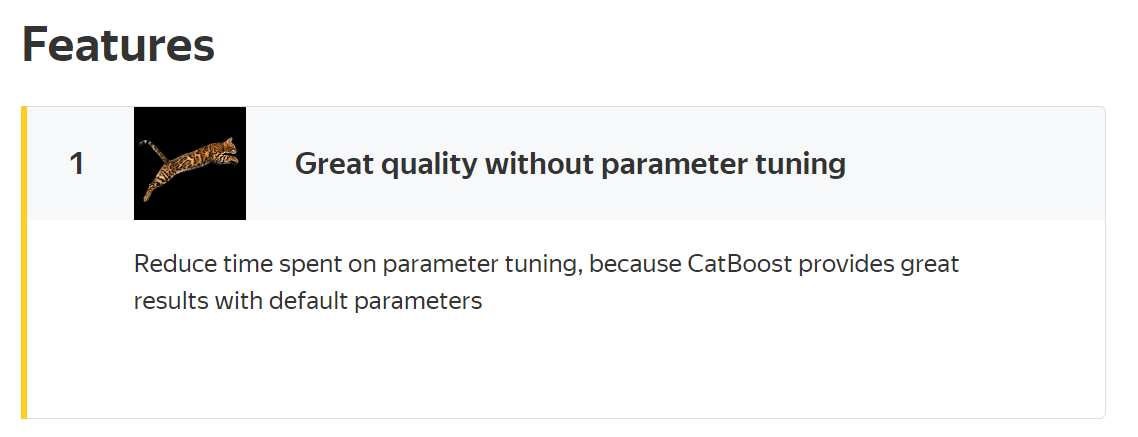

Just for the sake of it, lets plot the feature importances. (Which obviously happen to be almost the same)

In [55]:
px.bar(model.feature_importances_, x=X_train.columns, y=model.feature_importances_, title="Feature importance")

----------------------

Okay... but... why Catboost? Why cant we use another model? Like Random Forest? \
Well... we already relied on Pycaret to tell us which model to use, so we will just use that model.

In [56]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

y_pred3 = rfc.predict(X_test)
score = mean_absolute_error(y_pred3, y_test)
cv = cross_val_score(rfc, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
acper_list = list(acper(y_test, y_pred3))

print(f"Mean rental count: {y_test.mean()}")
print(f"R2 SCORE: {r2_score(y_pred3, y_test)}")
print(f"MAE CV: {-cv}")
print(f"MAE: {mean_absolute_error(y_pred3, y_test)}")
print(f"Percentage of error: {mean_absolute_error(y_pred3, y_test)/y_test.mean()*100:.2f}% \n")
print(f"Almost Correct Predictions: {(acper_list.count(True)/len(acper_list))*100:.2f}%")

Mean rental count: 240.2323407202216
R2 SCORE: 0.7928320297582399
MAE CV: [57.99905667 38.71161368 37.18073255 60.31541811 51.64248877]
MAE: 55.98
Percentage of error: 23.30% 

Almost Correct Predictions: 95.33%


Funny enough, random forest performs significantly worse than the other 2, but if we apply the threshold of 2 bikes, it is able to predict more than 4% correct rentals! \
Btw, feature importance is exactly the same too, so no need to plot it.

**WHAT IF WE DO AN ENSEMBLE OF THE 3 MODELS?**

In [71]:
ensembled_predictions = pd.DataFrame([y_pred, y_pred_2, y_pred3], index=["catboost", "catboost_tuned", "random_forest"]).T
ensembled_predictions

catboost  catboost_tuned  random_forest
0     151.155858      155.553635         159.74
1      96.559673      102.919740         100.44
2      67.375589       72.243571          79.69
3      31.021922       42.394468          33.01
4      14.510154       28.100533          10.54
...          ...             ...            ...
2883  312.621517      317.307176         358.35
2884  229.690934      217.282169         227.58
2885  172.114542      175.613937         162.87
2886  128.362180      128.593634         125.08
2887   78.225746       81.273599          70.50

[2888 rows x 3 columns]

In [72]:
ensembled_predictions = ensembled_predictions.mean(axis=1)
ensembled_predictions

0       155.483164
1        99.973138
2        73.103053
3        35.475463
4        17.716896
           ...    
2883    329.426231
2884    224.851034
2885    170.199493
2886    127.345271
2887     76.666448
Length: 2888, dtype: float64

In [73]:
print(f"Mean rental count: {y_test.mean()}")
print(f"R2 SCORE: {r2_score(ensembled_predictions, y_test)}")
print(f"MAE CV: {-cv}")
print(f"MAE: {mean_absolute_error(ensembled_predictions, y_test)}")
print(f"Percentage of error: {mean_absolute_error(ensembled_predictions, y_test)/y_test.mean()*100:.2f}% \n")
print(f"Almost Correct Predictions: {(acper_list.count(True)/len(acper_list))*100:.2f}%")

Mean rental count: 240.2323407202216
R2 SCORE: 0.8507068041889725
MAE CV: [57.99905667 38.71161368 37.18073255 60.31541811 51.64248877]
MAE: 49.469649760097376
Percentage of error: 20.59% 

Almost Correct Predictions: 95.33%


- R2 score almost remained almost the same, with a loss of 0.001%
- Mean Squared error improved a little tiny bit (1.26%)
- Percentage of error improved by 0.53%
- Number of almost correct predictions remained the same as in the Random Forest model (the threshold of 2 doesnt leave much space for improvement)

Overall, doing an ensemble of the 3 models improved the model a little bit, but not much, maybe if we combined more different and better models we could get a better result.